/Users/bill/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 100)        │        42,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         1,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,770 (295.98 KB)

 Trainable params: 75,770 (295.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - loss: 0.2893 - val_loss: 0.5270
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.2110 - val_loss: 0.3452
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1420 - val_loss: 0.2038
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1003 - val_loss: 0.1338
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0752 - val_loss: 0.1034
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0627 - val_loss: 0.0691
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0616 - val_loss: 0.0562
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0561 - val_loss: 0.0657
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0533 - val_loss: 0.0625
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0519 - val_loss: 0.0506
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0512 - val_loss: 0.0365
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0454 - val_loss: 0.0384

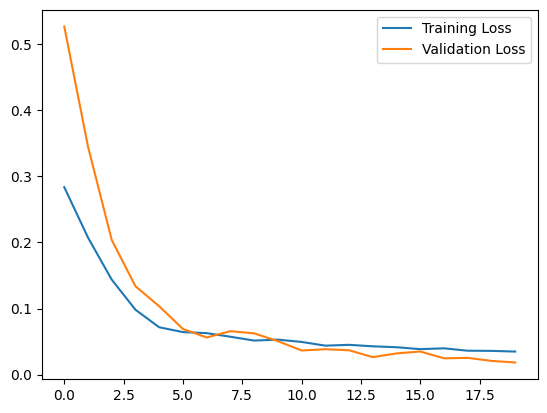

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
                  Open        High         Low       Close
2024-12-13  134.372330  134.923996  135.114105  135.951035
2024-12-14  138.496902  137.049591  132.516418  136.502914
2024-12-15  135.353165  139.927002  136.263153  133.868423
2024-12-16  136.980545  138.576569  133.758759  131.537445
2024-12-17  136.892303  139.809875  131.571152  136.059891


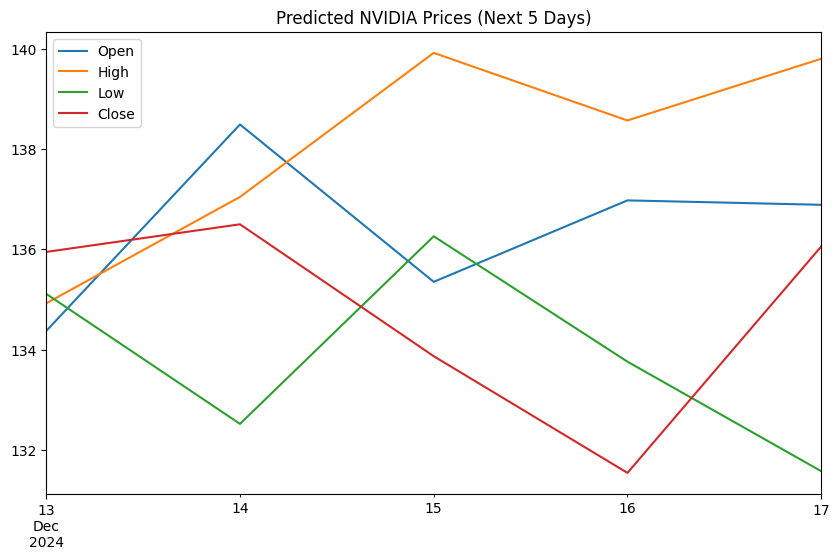

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Fetch NVIDIA data
def fetch_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    return data[['Open', 'High', 'Low', 'Close']]

# Fetch data
start_date = "2023-01-01"
end_date = "2024-12-13"
data = fetch_stock_data("NVDA", start_date, end_date)

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare training and target sets for LSTM
def prepare_data(data, n_past, n_future):
    """
    Prepare sequences of input data and corresponding output data for LSTM.
    :param data: Scaled historical stock prices
    :param n_past: Number of past days to use for prediction
    :param n_future: Number of future days to predict
    :return: Input and output datasets
    """
    X, y = [], []
    for i in range(n_past, len(data) - n_future + 1):
        X.append(data[i - n_past:i, :])  # Past data
        y.append(data[i:i + n_future, :])  # Future data
    return np.array(X), np.array(y)

n_past = 30  # Use the past 30 days
n_future = 5  # Predict the next 5 days
X, y = prepare_data(scaled_data, n_past, n_future)

# Split into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(n_past, X.shape[2])),
    Dropout(0.1),
    LSTM(50, return_sequences=False),
    Dropout(0.1),
    Dense(50, activation='tanh'),
    Dense(n_future * 4)  # 4 outputs per day (Open, High, Low, Close)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train.reshape(y_train.shape[0], -1), epochs=20, batch_size=32, validation_data=(X_test, y_test.reshape(y_test.shape[0], -1)))

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Make predictions
def predict_future(data, model, n_past, n_future, scaler):
    last_n_days = data[-n_past:]
    input_data = np.expand_dims(last_n_days, axis=0)
    prediction = model.predict(input_data)
    prediction = prediction.reshape(n_future, 4)  # Reshape to 5x4
    return scaler.inverse_transform(prediction)

# Predict the next 5 days
scaled_data_for_prediction = scaled_data[-n_past:]
predicted_prices = predict_future(scaled_data_for_prediction, model, n_past, n_future, scaler)

# Create a DataFrame for predicted prices
predicted_df = pd.DataFrame(predicted_prices, columns=['Open', 'High', 'Low', 'Close'])
predicted_df.index = pd.date_range(start=end_date, periods=n_future)
print(predicted_df)

# Save the model and predictions
model.save("nvda_lstm_model.keras")
predicted_df.to_csv("predicted_nvda_prices.csv")

# Plot predictions
predicted_df.plot(title="Predicted NVIDIA Prices (Next 5 Days)", figsize=(10, 6))
plt.show()


Validation 

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from pandas.tseries.offsets import BDay

def predict_from_date(input_date, ticker="NVDA", n_past=30, n_future=5):
    """
    Load the trained model, fetch the last 30 days of data up to the given date,
    predict the next 5 days of stock prices, and return them as a DataFrame.
    
    :param input_date: The end date (string, 'YYYY-MM-DD') up to which we consider historical data.
    :param ticker: The stock ticker symbol, default is "NVDA".
    :param n_past: Number of past days to use for prediction, default is 30.
    :param n_future: Number of future days to predict, default is 5.
    :return: A DataFrame with the predicted prices (Open, High, Low, Close).
    """
    
    # Convert input_date to a pandas Timestamp
    input_date = pd.to_datetime(input_date)
    
    # We will fetch a bit more than 30 days to ensure we get 30 trading days 
    # (in case there are weekends/holidays). Let's fetch the past 60 days.
    start_date = (input_date - pd.Timedelta(days=60)).strftime('%Y-%m-%d')
    end_date = input_date.strftime('%Y-%m-%d')

    # Fetch last 60 days of historical data from Yahoo Finance, then select last 30 trading days
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    
    # If there's not enough data, return an empty DataFrame or raise an error
    if len(data) < n_past:
        raise ValueError(f"Not enough data to get {n_past} past days. Only got {len(data)} days.")
    
    # Select only the last n_past days
    recent_data = data[['Open', 'High', 'Low', 'Close']].iloc[-n_past:]
    
    # Fit a new scaler on these 30 days (Note: This won't be identical to training-time scaling)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_recent = scaler.fit_transform(recent_data)
    
    # Load the saved model
    model = load_model("nvda_lstm_model.keras")
    
    # Prepare input data for prediction
    input_data = np.expand_dims(scaled_recent, axis=0)
    
    # Predict
    prediction = model.predict(input_data)
    # Reshape predictions to (n_future, 4)
    prediction = prediction.reshape(n_future, 4)
    
    # Inverse transform predictions
    predicted_prices = scaler.inverse_transform(prediction)
    
    # Create a DataFrame with predicted prices
    # Predictions start from the next trading day after input_date.
    # We'll assume consecutive business days for the next 5 days.
    start_pred_date = input_date + pd.offsets.BDay(1)
    pred_index = pd.date_range(start=start_pred_date, periods=n_future, freq='B')
    predicted_df = pd.DataFrame(predicted_prices, columns=['Open', 'High', 'Low', 'Close'], index=pred_index)
    
    return predicted_df

def actual_from_date(input_date, ticker="NVDA", n_future=5):
    """
    Fetch the actual next 5 business days of data from Yahoo Finance after the given date.
    
    :param input_date: The end date (string, 'YYYY-MM-DD') up to which we consider historical data.
    :param ticker: The stock ticker symbol, default is "NVDA".
    :param n_future: Number of future days to fetch, default is 5.
    :return: A DataFrame with the actual prices (Open, High, Low, Close) for the next n_future trading days.
    """
    # Convert input_date to a pandas Timestamp
    input_date = pd.to_datetime(input_date)
    
    # Calculate the date range for the next 5 business days
    start_pred_date = input_date + BDay(1)
    pred_index = pd.date_range(start=start_pred_date, periods=n_future, freq='B')
    
    # Fetch data from Yahoo Finance to cover this range
    # We'll fetch a bit more than needed to ensure we capture all 5 trading days
    end_fetch_date = (pred_index[-1] + BDay(1)).strftime('%Y-%m-%d')
    start_fetch_date = pred_index[0].strftime('%Y-%m-%d')
    
    stock = yf.Ticker(ticker)
    future_data = stock.history(start=start_fetch_date, end=end_fetch_date)
    # Filter only the dates we need
    future_data = future_data[['Open', 'High', 'Low', 'Close']]
    # Format the index to YYYY-MM-DD
    future_data.index = future_data.index.strftime('%Y-%m-%d')
    # Print the actual prices
    return future_data

# Example usage:
test_date = "2024-8-03"
predicted_df = predict_from_date(test_date)
actual_df = actual_from_date(test_date)
print("Predicted Prices:")
print(predicted_df)
print("\nActual Prices:")
print(actual_df)





/Users/bill/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
Predicted Prices:
                  Open        High         Low       Close
2024-08-05  114.077026  114.862030  111.235809  112.340134
2024-08-06  114.037186  115.661469  111.545326  111.992996
2024-08-07  114.051476  115.390907  111.421082  112.367050
2024-08-08  115.124275  115.838379  111.766998  113.091591
2024-08-09  114.968803  115.868446  111.385979  112.377754

Actual Prices:
                  Open        High         Low       Close
Date                                                      
2024-08-05   92.045783  103.394036   90.675999  100.434486
2024-08-06  103.823962  107.693367  100.534476  104.233902
2024-08-07  107.793349  108.783202   98.674762   98.894730
2024-08-08  101.984246  105.483706   97.504935  104.953789
2024-08-09  105.623688  106.583539  103.414030  104.733826
